# Data Understanding
You are provided with daily historical sales data. The task is to forecast the total amount of products sold in every shop for the test set. Note that the list of shops and products slightly changes every month. Creating a robust model that can handle such situations is part of the challenge.
This datasets was get in the Kaggle: https://www.kaggle.com/c/competitive-data-science-predict-future-sales/data

In this stage we will understanding our Datasets, see how they fit, search for some NAN, missing values, type of my vars and the plot it in a table and graphs and identify the quality of our data.

### <b/> File descriptions </b>
sales_train.csv - the training set. Daily historical data from January 2013 to October 2015.  
test.csv - the test set. You need to forecast the sales for these shops and products for November 2015.  
sample_submission.csv - a sample submission file in the correct format.  
items.csv - supplemental information about the items/products.  
item_categories.csv  - supplemental information about the items categories.  
shops.csv- supplemental information about the shops.  
df_sales.csv - The complete translated relationed dataset.  
### <b/> Data fields </b>

ID - an Id that represents a (Shop, Item) tuple within the test set.  
shop_id - unique identifier of a shop.  
item_id - unique identifier of a product.  
item_category_id - unique identifier of item category.  
item_cnt_day - number of products sold. You are predicting a monthly amount of this measure.  
item_price - current price of an item.  
date - date in format dd/mm/yyyy.  
date_block_num - a consecutive month number, used for convenience. January 2013 is 0, February 2013 is 1,..., October 2015 is 33.  
item_name - name of item.  
shop_name - name of shop.  
item_category_name - name of item category.  

This dataset was in Russia Language, and I had a little difficult to understand the products that we will analyze, so to workaround it I Used a Google Translator API where is the code is available in this GitHub.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.patches as mpatches
import datetime

Reading our data in .csv format and using the function dropna to clear the missing value and see the shape of our data.

In [2]:
df = pd.read_csv("df_sales.csv",sep=",",index_col=[0]);
df=df.dropna()
df.shape

C:\Users\Anthony\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


(2672096, 7)

Using the data description provided by Coursera, we will rename the columns and see the head of the dataframe

In [3]:
df.columns = ['Date', 'Data_Block_Num', 'Shop_id', 'Price', 'Item_cnt_day', 'Item_name', 'Category']
df.head()

,Date,Data_Block_Num,Shop_id,Price,Item_cnt_day,Item_name,Category
0,02.01.2013,0,59,999.0,1.0,Phenomenon 2012 (BD),Cinema - Blu-ray
1,23.01.2013,0,24,999.0,1.0,Phenomenon 2012 (BD),Cinema - Blu-ray
2,20.01.2013,0,27,999.0,1.0,Phenomenon 2012 (BD),Cinema - Blu-ray
3,02.01.2013,0,25,999.0,1.0,Phenomenon 2012 (BD),Cinema - Blu-ray
4,03.01.2013,0,25,999.0,1.0,Phenomenon 2012 (BD),Cinema - Blu-ray


Another important thing to start our analysis is identify the data type of ou dataset, it's lot important to understand what kind of advanced analytics technique we will apply and what kind information we can extract.

In [4]:
df.dtypes

Date               object
Data_Block_Num      int64
Shop_id             int64
Price             float64
Item_cnt_day      float64
Item_name          object
Category           object
dtype: object

As our intent is predict the sales the most important data type is the Date, price and product. We can notice that our Date is in Object format, so we need to convert it to Datetime.

In [5]:
df['Date'] = pd.to_datetime(df['Date'], format = '%d.%m.%Y')

Let's start our play with the data and see what category is the champion in sales, maybe we can get some insights.

In [6]:
Categories = df.groupby(['Category']).size().reset_index(name = 'Freq')
Categories= Categories.sort_values(['Freq'], ascending=False)
top20_categories = Categories.head(7).reset_index()
del top20_categories['index']     
top20_categories.head()

,Category,Freq
0,Cinema - DVD,526385
1,PC Games - Standard Editions,328654
2,Music - Local Production CD,311708
3,Games - PS3,192785
4,Cinema - Blu-ray,176666


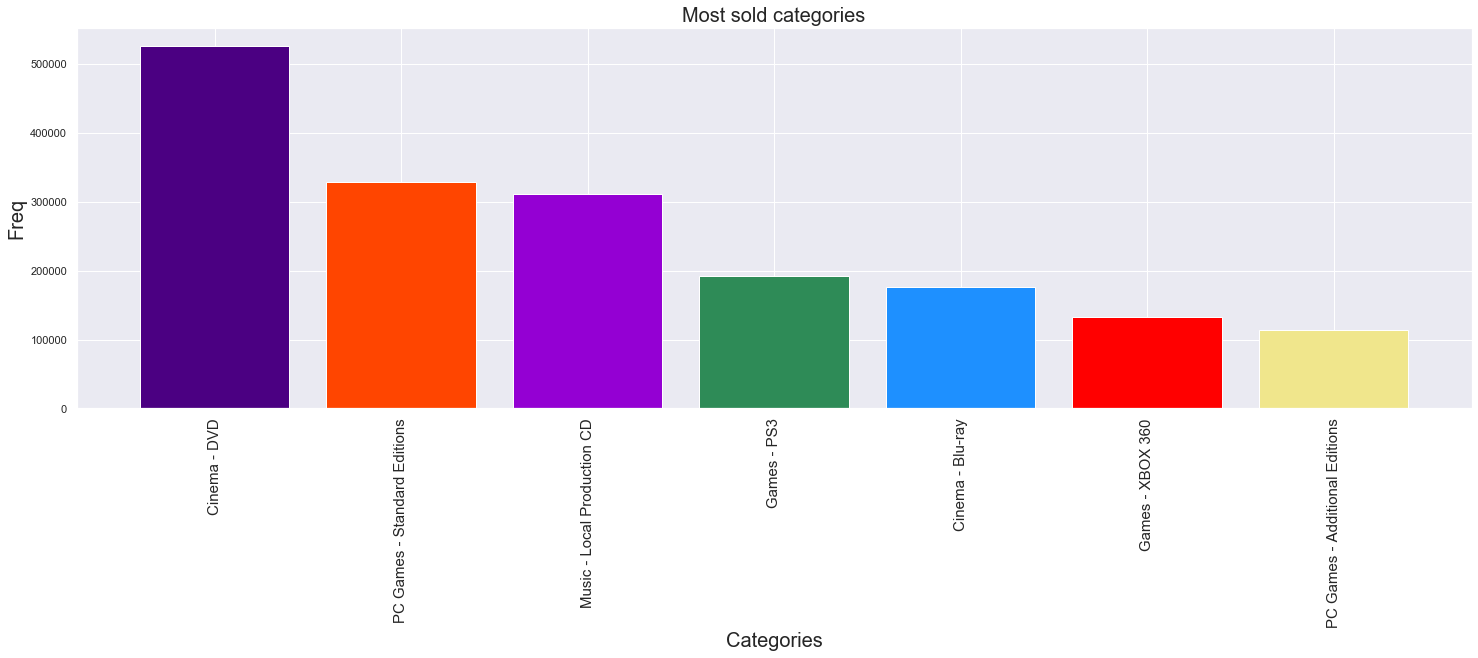

In [8]:
height = top20_categories['Freq']
bars = top20_categories['Category']
y_pos = np.arange(len(bars))
plt.bar(y_pos, height, color=['indigo','orangered','darkviolet','seagreen','dodgerblue','red','khaki'])
plt.xlabel('Categories',fontsize=20)
plt.rcParams['figure.figsize'] = (25,7)
plt.ylabel('Freq', fontsize=20)
plt.xticks(y_pos, bars, rotation=90, fontsize=15)
plt.title("Most sold categories", fontsize=20)
plt.show()

The champion category is Cinema - DVD, PC Games, Music and PS3 Games,but we need to understand the impact of this sales in our invoice. So, using my limited Business Knowledge, our invoice is defined to our sales and the price of the items.
Using the Describe Function we can get a little more information about our dataset.

In [9]:
df.describe(include = 'all')

,Date,Data_Block_Num,Shop_id,Price,Item_cnt_day,Item_name,Category
count,2672096,2.672096e+06,2.672096e+06,2.672096e+06,2.672096e+06,2672096,2672096
unique,911,NaN,NaN,NaN,NaN,20394,83
top,2013-12-28 00:00:00,NaN,NaN,NaN,NaN,Corporate package shirt 1C Interest white (34 ...,Cinema - DVD
freq,9434,NaN,NaN,NaN,NaN,27289,526385
first,2013-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,2015-06-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.294483e+01,3.306017e+01,8.737170e+02,1.242473e+00,NaN,NaN
std,NaN,8.245074e+00,1.620655e+01,1.701665e+03,2.199196e+00,NaN,NaN
min,NaN,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01,NaN,NaN
25%,NaN,6.000000e+00,2.200000e+01,2.490000e+02,1.000000e+00,NaN,NaN


We can obtain the basic information about the dataset that we're working.  The most important things we have in the moment is the Price Column:

&emsp;&emsp; 25% of the items have a price below 249 Russian Ruble.  
&emsp;&emsp; 50% of the items have a price below 399 Russian Ruble.  
&emsp;&emsp; 75% of the items have a price below 1568 Russian Ruble.

Where, the top price is 307k Russian Ruble, this shows how much the market in this business is varied.

Due the dataset contain 23k types of items, we will follow the items that provides the best invoices. Let's group by item_name and price items.

In [10]:
unique_items = df.groupby(['Item_name', 'Price','Category']).size().reset_index(name = 'Freq')

In [11]:
unique_items.shape

(108104, 4)

But we have another issue, each shop charges a different values for the item, so we have to make the average for this items.

In [12]:
price_table = unique_items.groupby(['Item_name','Category'], as_index = False).agg({"Price": "mean","Freq":"sum"})
price_table['Invoice'] = price_table['Price']*price_table['Freq']   ## creating the invoice column
price_table= price_table.sort_values(['Invoice'], ascending=False)

In [13]:
top10_invoce = price_table.head(10).reset_index()
del top10_invoce['index']

In [14]:
top10_invoce

,Item_name,Category,Price,Freq,Invoice
0,Sony PlayStation 4 (500 Gb) Black (CUH-1008A/1...,Game Consoles - PS4,21244.020399,4954,1.052429e+08
1,Sony PS4 Kit (500 Gb) Black (CUH-1108A / B01) ...,Game Consoles - PS4,25581.946849,848,2.169349e+07
2,"Grand Theft Auto V [PS3, Russian subtitles]",Games - PS3,2541.224230,6129,1.557516e+07
3,Grand Theft Auto V [Xbox 360 Russian Subtitles],Games - XBOX 360,2540.371906,5510,1.399745e+07
4,"Some of us [PS3, Russian version]",Games - PS3,2331.282346,5222,1.217396e+07
5,"Комплект ""Microsoft Xbox One 500GB (Day One Ed...",Game Consoles - XBOX ONE,17752.061147,660,1.171636e+07
6,PS4: Wireless Black Game Controller (Dualshock...,Accessories - PS4,3080.078295,3632,1.118684e+07
7,Playstation Store wallet replenishment: Paymen...,Payment Cards - PSN,2444.703844,4431,1.083248e+07
8,Acceptance of funds for 1C-Online,Office,1212.860421,7426,9.006701e+06
9,Playstation Store wallet replenishment: Paymen...,Payment Cards - PSN,979.778282,8570,8.396700e+06


#### Each color represents a different type of category

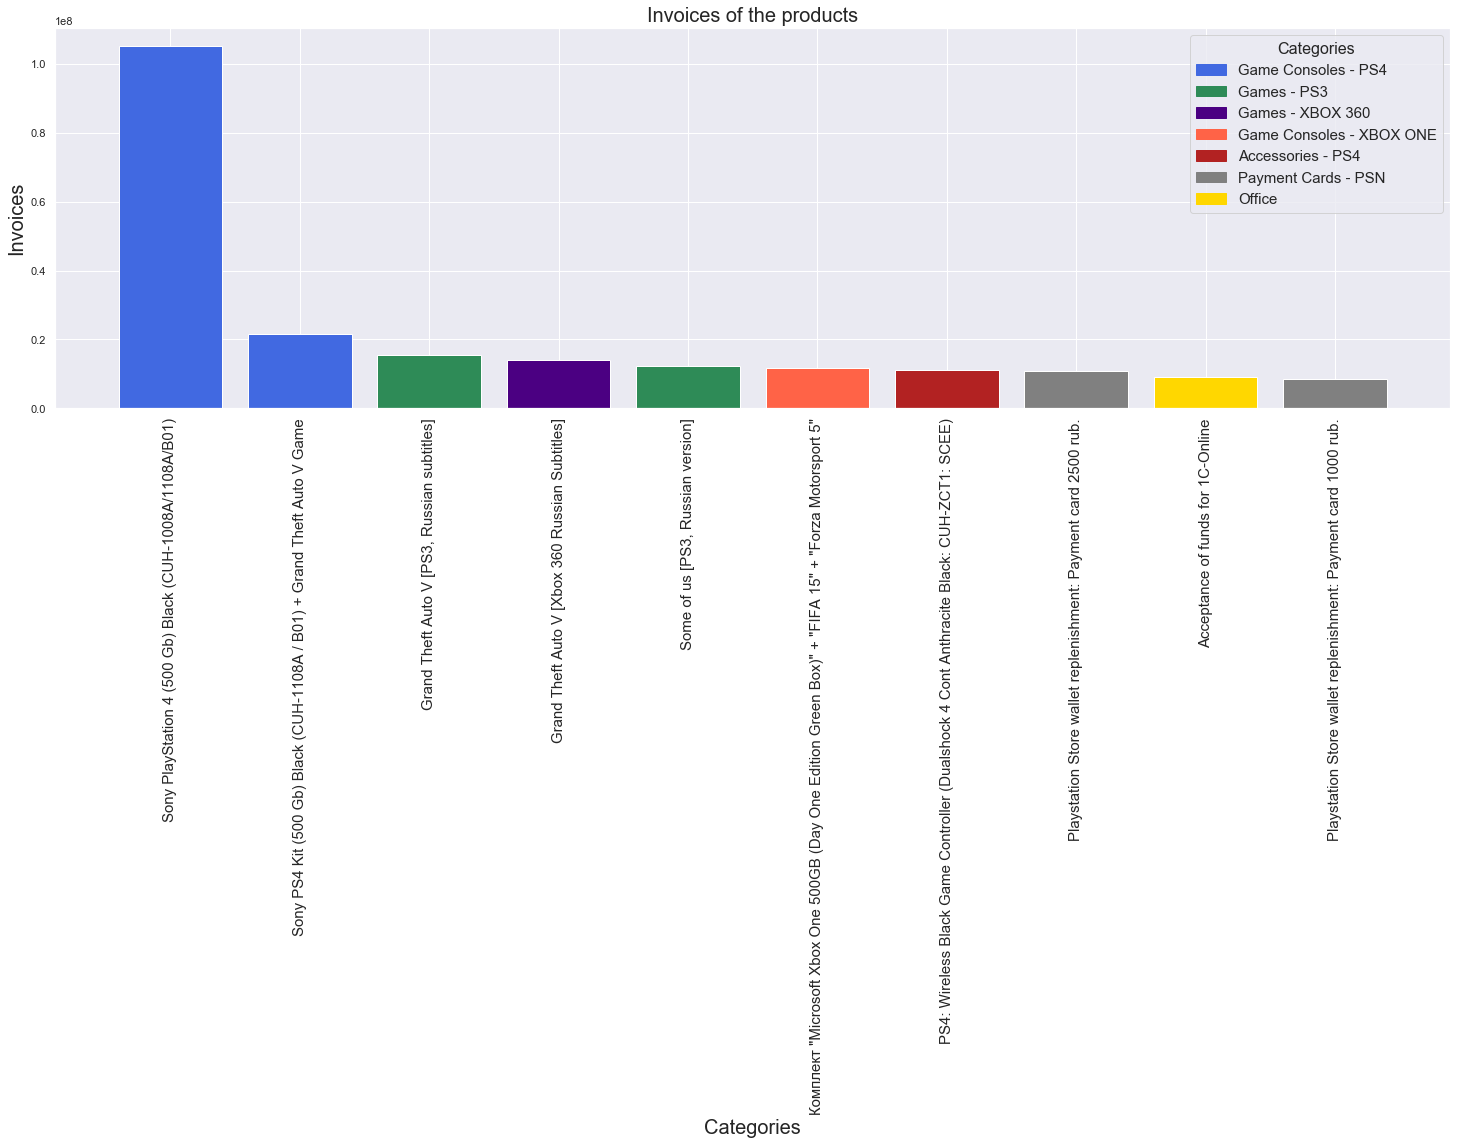

In [16]:
height = top10_invoce['Invoice']
bars = top10_invoce['Item_name']
y_pos = np.arange(len(bars))
plt.bar(y_pos, height, color=['royalblue','royalblue','seagreen','indigo','seagreen','tomato','firebrick','grey','gold','grey'])
plt.title('Invoices of the products',fontsize=20)
plt.xlabel('Categories',fontsize=20)
royalblue_patch = mpatches.Patch(color='royalblue', label='Game Consoles - PS4')
seagreen_patch = mpatches.Patch(color='seagreen', label='Games - PS3')
indigo_patch = mpatches.Patch(color='indigo', label='Games - XBOX 360')
tomato_patch = mpatches.Patch(color='tomato', label='Game Consoles - XBOX ONE')
firebrick_patch = mpatches.Patch(color='firebrick', label='Accessories - PS4')
grey_patch = mpatches.Patch(color='grey', label='Payment Cards - PSN')
gold_patch = mpatches.Patch(color='gold', label='Office')
plt.legend(title_fontsize=16,handles=[royalblue_patch,seagreen_patch,indigo_patch,tomato_patch,firebrick_patch,grey_patch,gold_patch], title = "Categories", loc='best', fontsize=15 )
plt.rcParams['figure.figsize'] = (25,7)
plt.ylabel('Invoices',fontsize=20)
plt.xticks(y_pos, bars, rotation=90, fontsize=15)
plt.show()

How we can notice the invoice of Sony Playstation 4 represents about 10 times more than the others invoices products, it's about 10^8 Russia Ruble. But we can't stop to understanding what is the main source of invoices, so now we can to analyze about the invoice generated by categories.

In [17]:
category_table = df.groupby(['Category', 'Price'], as_index = False).size().reset_index(name = 'Freq')
category_table = category_table.groupby('Category', as_index = False).agg({"Price": "mean","Freq":"sum"})
category_table['Category_Invoice'] = category_table['Price'] * category_table['Freq']
category_table= category_table.sort_values(['Category_Invoice'], ascending=False)
top10_category = category_table.head(10).reset_index()
del top10_category['index']
top10_category.head()

,Category,Price,Freq,Category_Invoice
0,Games - PS3,1537.069154,192785,2.963239e+08
1,PC Games - Standard Editions,576.104123,328654,1.893389e+08
2,Games - XBOX 360,1333.984883,133447,1.780163e+08
3,Games - PS4,2553.701946,61191,1.562636e+08
4,Programs - For home and office,3928.997297,39756,1.562012e+08


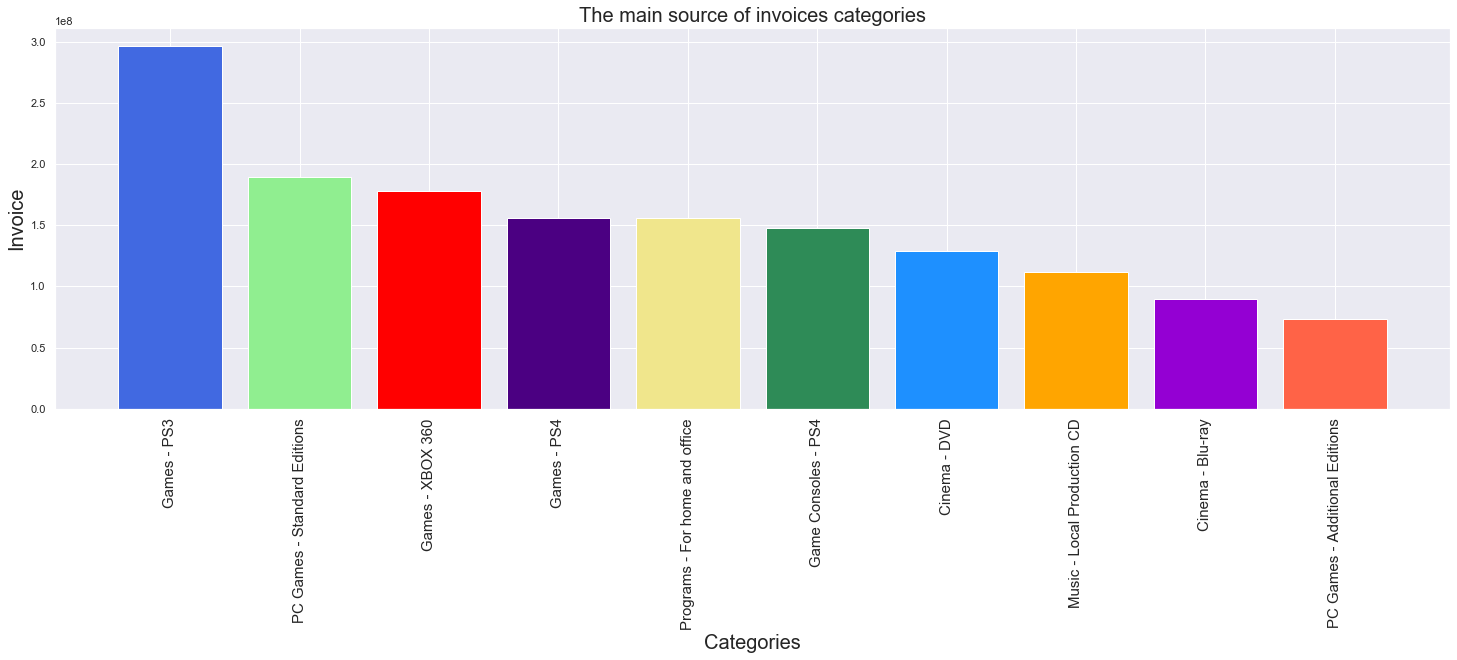

In [18]:
height = top10_category['Category_Invoice']
bars = top10_category['Category']
y_pos = np.arange(len(bars))
plt.bar(y_pos, height, color=['royalblue','lightgreen','red','indigo','khaki','seagreen','dodgerblue','orange','darkviolet','tomato'])
plt.xlabel('Categories',fontsize=20)
plt.rcParams['figure.figsize'] = (25,7)
plt.ylabel('Invoice',fontsize=20)
plt.xticks(y_pos, bars, rotation=90, fontsize=15)
plt.title("The main source of invoices categories",fontsize=20)
plt.show()

In this bar plot we can see that the best invoice comes from Games - PS3, where it represents 3.10^8 Rublo russo in 2013 to 2015, following by PC Games, Games XBOX 360 and Games PS4. The most sold item Sony PS4 is in the Game Consoles - PS4 category in the 6th position. So we can conclude that the Games - PS3 is the best resource of invoices due the massive quantity of sales. Thus our analysis will focus on the Games - PS3, the Game Consoles - PS4 and  Games - PS4 categories.

# Data Exploration

As defined in the previous step our analysis will focus on the Games - PS3, the Game Consoles - PS4 and  Games - PS4 categories, so we need to create the dataframe filtered to analyse the time series of sales for this categories.

Creating the Dataframe of the interested categories

In [19]:
####### Creating the Dataframe to Games - PS3 category
category1= df[df.Category == top10_category['Category'][0]]
category1_TS = category1.groupby(['Date','Price']).size().reset_index(name = 'Freq').groupby('Date', as_index = False).agg({"Price": "mean","Freq":"sum"})
category1_TS['Invoice'] = category1_TS['Price']*category1_TS['Freq'] 

####### Creating the Dataframe to Games - PS4 category
category2= df[df.Category == top10_category['Category'][3]]
category2_TS = category2.groupby(['Date','Price']).size().reset_index(name = 'Freq').groupby('Date', as_index = False).agg({"Price": "mean","Freq":"sum"})
category2_TS['Invoice'] = category2_TS['Price']*category2_TS['Freq'] 

####### Creating the Dataframe to Game Consoles - PS4 category
category3= df[df.Category == top10_category['Category'][5]]
category3_TS = category3.groupby(['Date','Price']).size().reset_index(name = 'Freq').groupby('Date', as_index = False).agg({"Price": "mean","Freq":"sum"})
category3_TS['Invoice'] = category3_TS['Price']*category3_TS['Freq'] 


In [20]:
category1_TS.dtypes

Date       datetime64[ns]
Price             float64
Freq                int64
Invoice           float64
dtype: object

Importing the datetime lib to create the columns informations about Day of Week, Week of Year and Quarter of year we will have...

In [21]:
import datetime
category1_TS['Date'] = pd.to_datetime(category1_TS['Date'], format = '%d.%m.%Y')
category1_TS['DayofWeek'] = category1_TS['Date'].dt.dayofweek
category1_TS['Weekofyear'] = category1_TS['Date'].dt.week
category1_TS['Quarter'] = category1_TS['Date'].dt.quarter
category1_TS.head(10)

,Date,Price,Freq,Invoice,DayofWeek,Weekofyear,Quarter
0,2013-01-01,1479.487115,128,189374.350769,1,1,1
1,2013-01-02,1561.694303,525,819889.508928,2,1,1
2,2013-01-03,1483.195423,443,657055.572183,3,1,1
3,2013-01-04,1532.475859,399,611457.867576,4,1,1
4,2013-01-05,1490.351956,399,594650.430267,5,1,1
5,2013-01-06,1450.744940,321,465689.125893,6,1,1
6,2013-01-07,1452.292361,288,418260.200000,0,2,1
7,2013-01-08,1486.078333,264,392324.680000,1,2,1
8,2013-01-09,1527.695802,186,284151.419259,2,2,1
9,2013-01-10,1472.358864,190,279748.184091,3,2,1


So now, we can plot the time serie about the three main invoice source, where we can focus our forecast model of Machine Learning.

### Analysing the time serie of Game - PS3 category sales.

C:\Users\Anthony\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


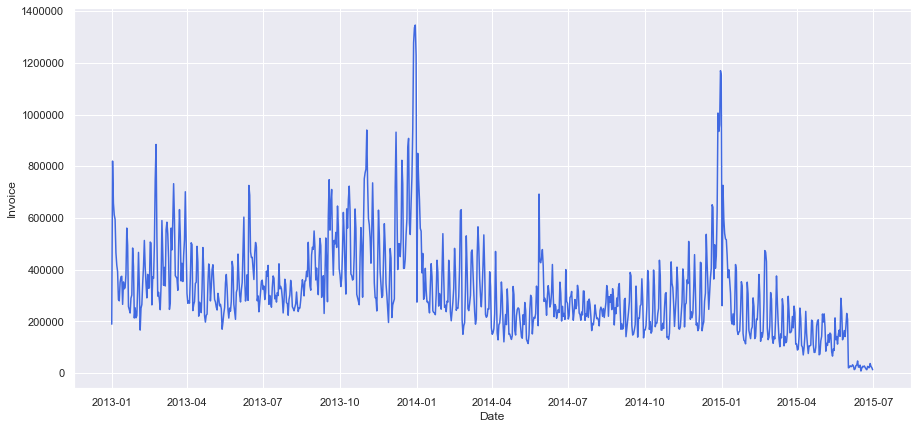

In [22]:
dim = (15, 7)
fig, ax = plt.subplots(figsize=dim)
ax = sns.lineplot(x="Date", y="Invoice", color = 'royalblue',data=category1_TS)

### Analysing the time serie of Game Consoles - PS4  category sales.

In [23]:
category2_TS['Date'] = pd.to_datetime(category2_TS['Date'], format = '%d.%m.%Y')
category2_TS['DayofWeek'] = category2_TS['Date'].dt.dayofweek
category2_TS['Weekofyear'] = category2_TS['Date'].dt.week
category2_TS['Quarter'] = category2_TS['Date'].dt.quarter
category2_TS.head()

,Date,Price,Freq,Invoice,DayofWeek,Weekofyear,Quarter
0,2013-11-22,2658.95,14,37225.3,4,47,4
1,2013-11-23,2799.00,20,55980.0,5,47,4
2,2013-11-24,2799.00,19,53181.0,6,47,4
3,2013-11-25,2799.00,35,97965.0,0,48,4
4,2013-11-26,2548.00,26,66248.0,1,48,4


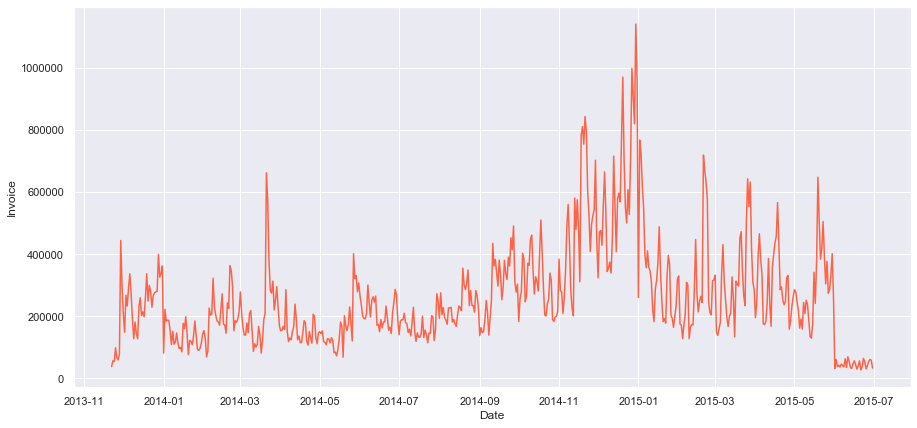

In [24]:
fig, ax = plt.subplots(figsize=dim)
ax = sns.lineplot(x="Date", y="Invoice", color = 'tomato', data=category2_TS)

### Analysing the time serie of Games - PS4 category sales.

In [25]:
category3_TS['Date'] = pd.to_datetime(category3_TS['Date'], format = '%d.%m.%Y')
category3_TS['DayofWeek'] = category3_TS['Date'].dt.dayofweek
category3_TS['Weekofyear'] = category3_TS['Date'].dt.week
category3_TS['Quarter'] = category3_TS['Date'].dt.quarter
category3_TS.head()

,Date,Price,Freq,Invoice,DayofWeek,Weekofyear,Quarter
0,2013-11-29,18232.266734,42,765755.202819,4,48,4
1,2013-11-30,18262.536797,41,748764.008658,5,48,4
2,2013-12-01,18370.127628,31,569473.956456,6,48,4
3,2013-12-02,18305.000000,22,402710.000000,0,49,4
4,2013-12-03,18359.666667,19,348833.666667,1,49,4


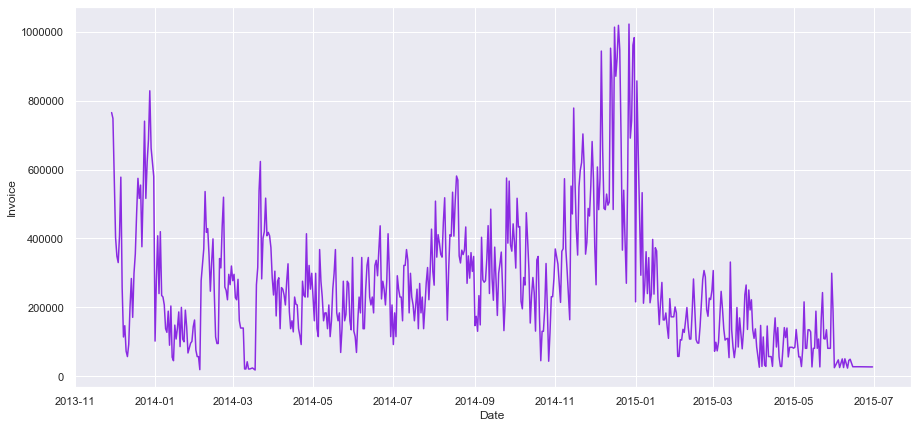

In [26]:
fig, ax = plt.subplots(figsize=dim)
ax = sns.lineplot(x="Date", y="Invoice", color = 'blueviolet', data=category3_TS)

Saving the Dataset to analyse separately in the next steps

In [27]:
category1_TS.to_csv("category1_TS.csv", header = True, index = False)
category2_TS.to_csv("category2_TS.csv", header = True, index = False)
category3_TS.to_csv("category3_TS.csv", header = True, index = False)